<a href="https://colab.research.google.com/github/ranaprikshit/Multiple-Linear-Regression/blob/master/tsf_assignment_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [181]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [182]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [183]:
path="/content/drive/MyDrive/tsf_dataset/SampleSuperstore.csv"
df=pd.read_csv(path)
df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [184]:
df.shape

(9994, 13)

In [185]:
#  count null values in each column of dataset
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [187]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [188]:

#  ch6ecking correlation 
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


In [189]:
# unique value
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

from above we get that sales is maximum correlated with profit which is 47.9% and after that discount is 21.9% correlated with profit. 

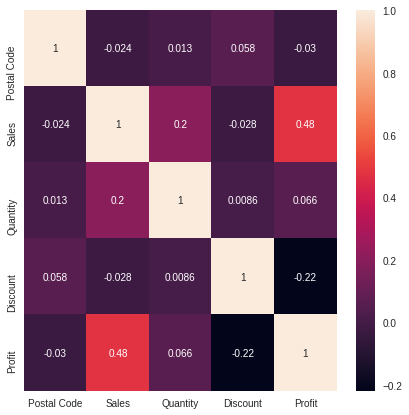

In [190]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True)

In [191]:
df=df.drop_duplicates()
print(df.shape)

(9977, 13)


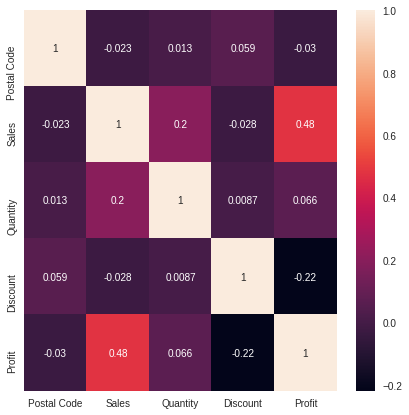

In [192]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True)

In [193]:
df=df.drop("Postal Code",axis=1)

In [194]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.00000
mean,230.148902,3.790719,0.156278,28.69013
std,623.721409,2.226657,0.206455,234.45784
min,0.444000,1.000000,0.000000,-6599.97800
25%,17.300000,2.000000,0.000000,1.72620
50%,54.816000,3.000000,0.200000,8.67100
75%,209.970000,5.000000,0.200000,29.37200
max,22638.480000,14.000000,0.800000,8399.97600


In [195]:

print("total sale is:",df.Sales.sum())
print("averge of sale is",df["Sales"].mean())
print("min. sale value is",min(df["Sales"]),"max sale is:",max(df["Sales"]))

total sale is: 2296195.5903
averge of sale is 230.14890150345346
min. sale value is 0.444 max sale is: 22638.48


In [196]:
print("total Profit is:",df.Profit.sum())
print("averge of Profit is",df["Profit"].mean())
print("min. Profit value is",min(df["Profit"]),"max Profit is:",max(df["Profit"]))

total Profit is: 286241.4226
averge of Profit is 28.69012955798349
min. Profit value is -6599.978 max Profit is: 8399.976


In [197]:
print("total Discount is:",df.Discount.sum())
print("averge of Discount is",df["Discount"].mean())
print("minimum Discount value is",min(df["Discount"]),"max Discount is:",max(df["Discount"]))

total Discount is: 1559.1900000000003
averge of Discount is 0.15627844041295935
minimum Discount value is 0.0 max Discount is: 0.8


In [198]:
print("total Quantity is:",df.Quantity.sum())
print("averge of Quantity is",df["Quantity"].mean())
print("minimum Quantity value is",min(df["Quantity"]),"max Quantity is:",max(df["Quantity"]))

total Quantity is: 37820
averge of Quantity is 3.7907186529016736
minimum Quantity value is 1 max Quantity is: 14


In [199]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

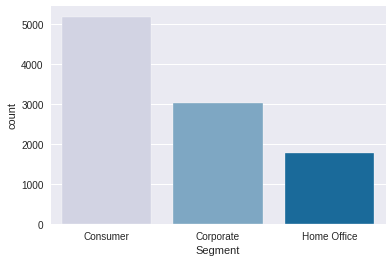

In [200]:
sns.countplot(df['Segment'],  palette = 'PuBu')
plt.show()

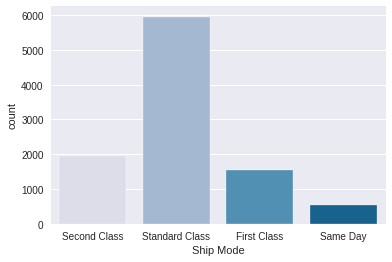

In [201]:
sns.countplot(df['Ship Mode'],  palette = 'PuBu')
plt.show()

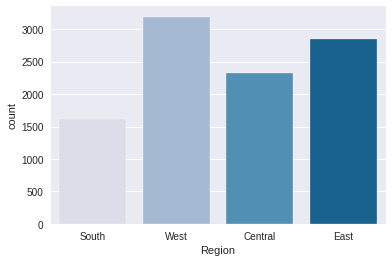

In [202]:
sns.countplot(df['Region'],  palette = 'PuBu')
plt.show()

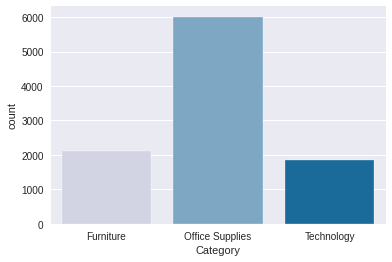

In [203]:
sns.countplot(df['Category'],  palette = 'PuBu')


In [204]:
import plotly.express as px
px.histogram(df,x="Region",y="Profit",width=500, height=400,color=df.Region,)




In [205]:

px.histogram(df,x="Discount",y="Profit",width=500, height=400,)




In [206]:

px.histogram(df,x="Ship Mode",y="Profit",width=500, height=400,color=df['Ship Mode'])


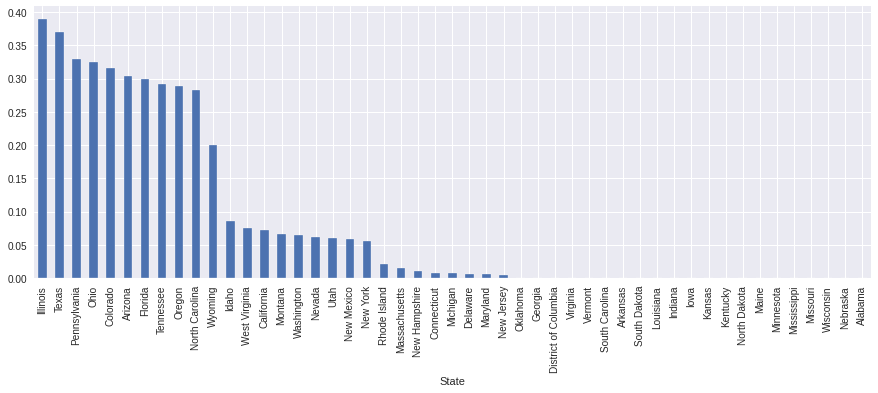

In [207]:
df_state_profit = df.groupby('State')['Discount'].mean().sort_values(ascending = False).plot.bar(figsize = (15, 5) )

In [208]:
print(df.groupby('State')['Profit'].sum().sort_values(ascending = False))


State
California              76330.7891
New York                74015.4622
Washington              33368.2375
Michigan                24428.0903
Virginia                18597.9504
Indiana                 18382.9363
Georgia                 16250.0433
Kentucky                11199.6966
Minnesota               10823.1874
Delaware                 9977.3748
New Jersey               9772.9138
Wisconsin                8401.8004
Rhode Island             7285.6293
Maryland                 7031.1788
Massachusetts            6785.5016
Missouri                 6436.2105
Alabama                  5786.8253
Oklahoma                 4853.9560
Arkansas                 4008.6871
Connecticut              3511.4918
Nevada                   3316.7659
Mississippi              3172.9762
Utah                     2546.5335
Vermont                  2244.9783
Louisiana                2196.1023
Nebraska                 2037.0942
Montana                  1833.3285
South Carolina           1769.0566
New Hampshire 

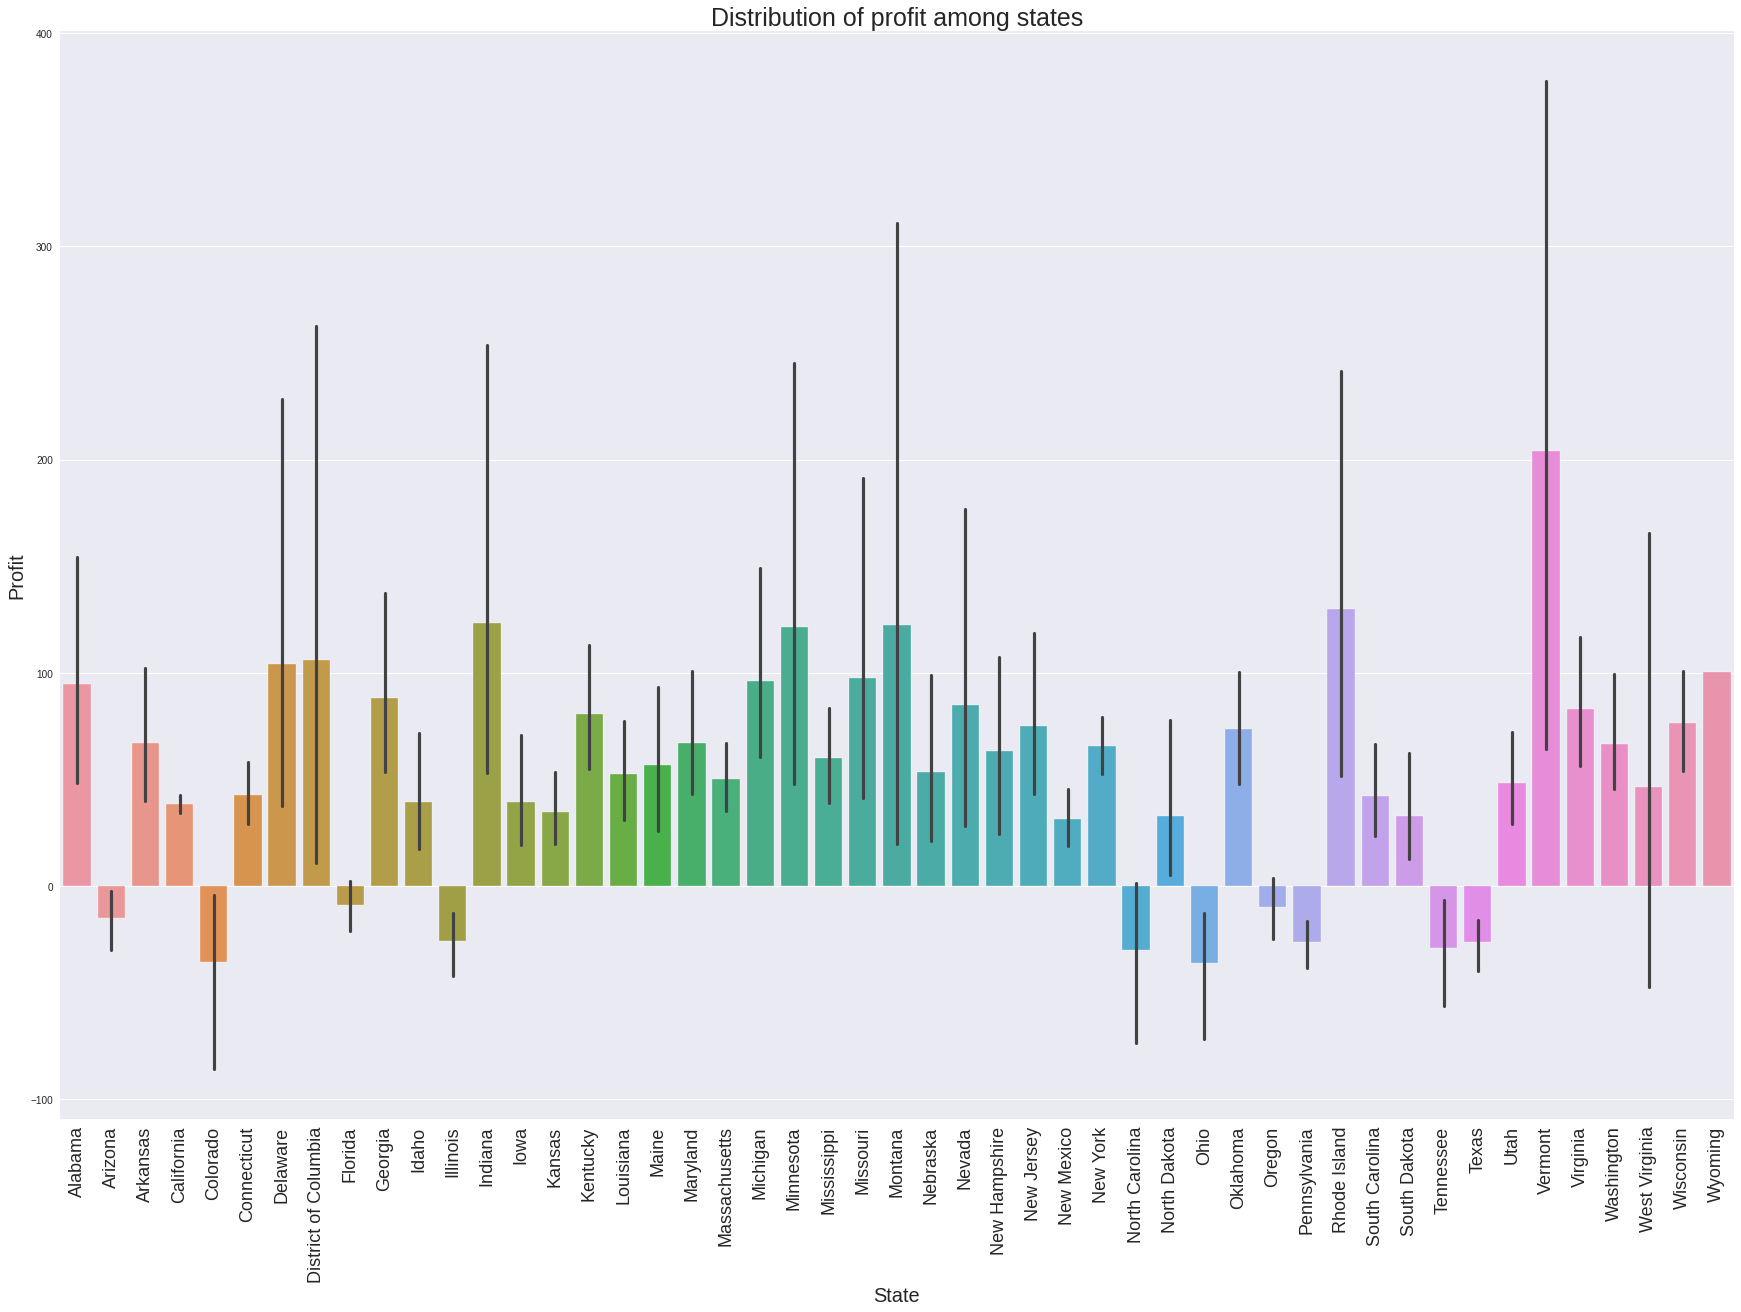

In [209]:
plt.figure(figsize=(30,20))
sns.barplot(x=df['State'].sort_values(ascending=True),y=df['Profit'])
plt.title('Distribution of profit among states',fontsize=25)
plt.xticks(rotation=90,fontsize=18)
plt.xlabel('State',fontsize=20)
plt.ylabel('Profit',fontsize=20)
plt.show()